# Exploratory Data Analysis of dataset for obtaining informaiton on old age injury in Victoria

### Data: Fall Injury hospitilisations

The first thing which we would be doing is to find the number of falls of older Australians.

We write the code for the same. The dataset is in 'xlsx' format. It is read using pandas and necessary adjustments are done to the dataset.

In [82]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel('aihw-injcat-206-Fall-injury-hospitalisations-16-17.xlsx', sheet_name = 1) 

In [14]:
df.columns = df.iloc[1]
df.head()

In [25]:
dfa = df.tail(18).head(12).dropna()
dfa=dfa.rename(columns = {np.nan:'Years'})
dfa

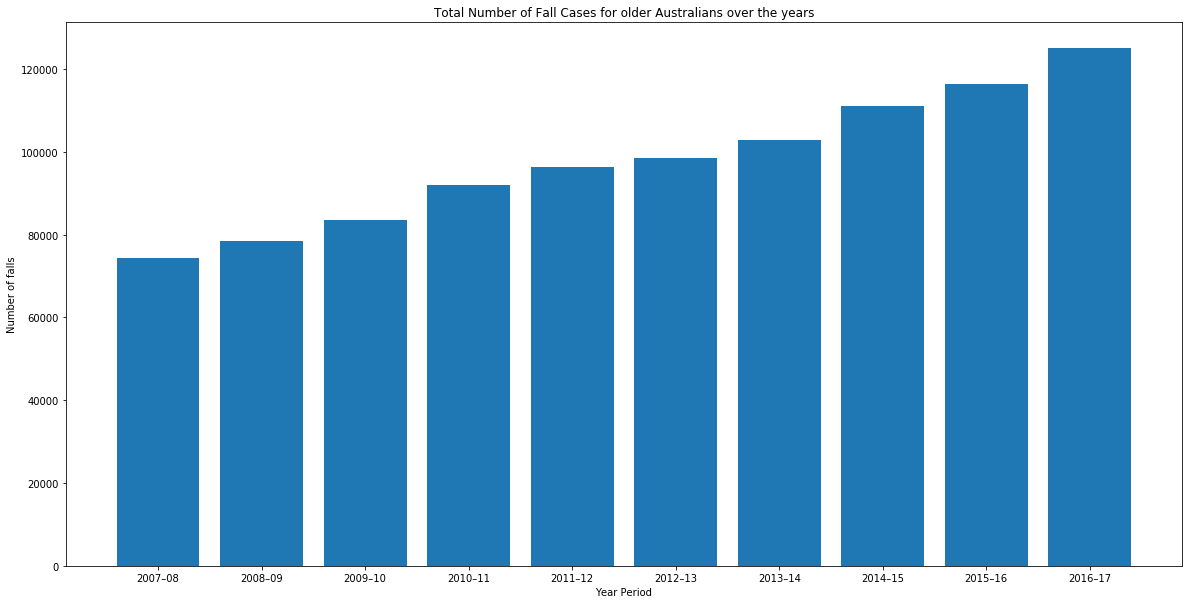

In [62]:
years = list(dfa['Years'])
falls_data = list(dfa['Total'])

plt.figure(figsize=(20,10))
plt.bar(years, falls_data)
plt.title("Total Number of Fall Cases for older Australians over the years")
plt.xlabel("Year Period")
plt.ylabel("Number of falls")
plt.show()

From the above plot we can see that the nuber of falls in older Australians is increasing over the years. Hence the applications which are present in the market are not good enough to sovlve the problem. Also most of the applications focuses on just giving plain advice which in some cases would be invalid or of no use to a person based on the situation. Hence we came up with a plan to first know the situation and surrounding of the old age person in consideration and then based on the input we would do analysis find the possibility of injury and give them meaningful adjustments they could do to mitigate it.

### Data: Place of occurence

This dataset has informtion related to the place of the occurence of the fall of the old age person. Using this data we can have a look at the falls per 100,000 old age peopl group. Firstly we exort the required dataset into python and create a dataframe object out of it.

In [83]:
df2 = pd.read_excel('aihw-injcat-206-Place-of-occurrence-16-17.xlsx', sheet_name=3)

In [84]:
df2.head()

,"Table S3: Age-standardised(a) rates (per 100,000 population) of hospitalised fall-related injury by place of residence, by sex, aged 65+, Australia, 2007–08 to 2016–17",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,Residential aged care,NaN,NaN,NaN,Community resident,NaN,NaN
1,NaN,Males,Females,Persons(b),NaN,Males,Females,Persons(b)
2,2007–08,7099.96,8440.44,7873.17,NaN,1038.97,1750.28,1450.06
3,2008–09,7237.01,8709.88,8092.62,NaN,1050,1796.55,1482.05
4,2009–10,7467.39,8990.1,8346.5,NaN,1111.94,1854.91,1539.08


Now that we have the data we make some adjustments to the dataset for using it for visualisaiton.

In [85]:
df2.columns = df2.iloc[1]
df2.head()

1,nan,Males,Females,Persons(b),nan,Males,Females,Persons(b)
0,NaN,Residential aged care,NaN,NaN,NaN,Community resident,NaN,NaN
1,NaN,Males,Females,Persons(b),NaN,Males,Females,Persons(b)
2,2007–08,7099.96,8440.44,7873.17,NaN,1038.97,1750.28,1450.06
3,2008–09,7237.01,8709.88,8092.62,NaN,1050,1796.55,1482.05
4,2009–10,7467.39,8990.1,8346.5,NaN,1111.94,1854.91,1539.08


The data has falls based on the location which is residential care and community resident. We classify the data into these 2 categories and then make the required modifications for using it in visualisation.

In [86]:
df_residintial_care = df2.iloc[1:12, 0:4]
df_community_resident = df2.iloc[1:12, [0,5,6,7]]

In [87]:
df_residintial_care.drop(1, inplace=True)
df_community_resident.drop(1, inplace=True)

### Plot for falls injury rate in Residintial care:

This is the plot of the falls of old age people per 100,000 people in a residential care.

In [155]:
df_residintial_care=df_residintial_care.rename(columns = {np.nan:'Years'})
df_residintial_care

1,Years,Males,Females,Persons(b)
2,2007–08,7099.96,8440.44,7873.17
3,2008–09,7237.01,8709.88,8092.62
4,2009–10,7467.39,8990.1,8346.5
5,2010–11,8438.77,9828.56,9211.74
6,2011–12,8508.98,10032.2,9342.88
7,2012–13,8298.44,9554.57,9026.71
8,2013–14,8746.68,9693.93,9290.09
9,2014–15,9594.38,10478.6,10082
10,2015–16,10393.9,11064.7,10770.3
11,2016–17,11410.2,11491.5,11403


In [163]:
Males_res = list(df_residintial_care['Males'])
Females_res = list(df_residintial_care['Females'])
Persons_res = list(df_residintial_care['Persons(b)'])
Years_res = list(df_residintial_care['Years'])

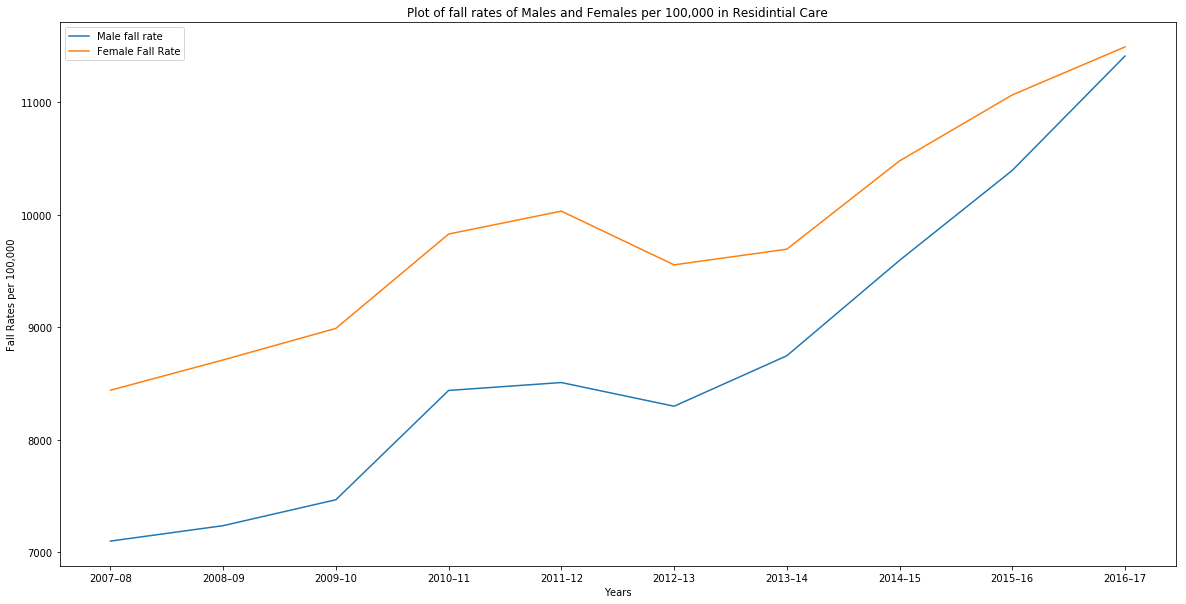

In [176]:
plt.figure(figsize=(20,10))
plt.xlabel("Years")
plt.ylabel("Fall Rates per 100,000")
plt.title("Plot of fall rates of Males and Females per 100,000 in Residintial Care")
plt.plot(Years_res, Males_res, Females_res)
plt.legend(['Male fall rate','Female Fall Rate'])

The number of falls in females is higher in residential care compared to the male falls. One interesting thing which we can see in the plot is that the number of falls in older females and males have alost been the same in recent years. As seen in the year 2016-2017 the number of falls in older males and females has almost been the same in the case of residential care. Something which we can have a closer look and analyse in future iterations.

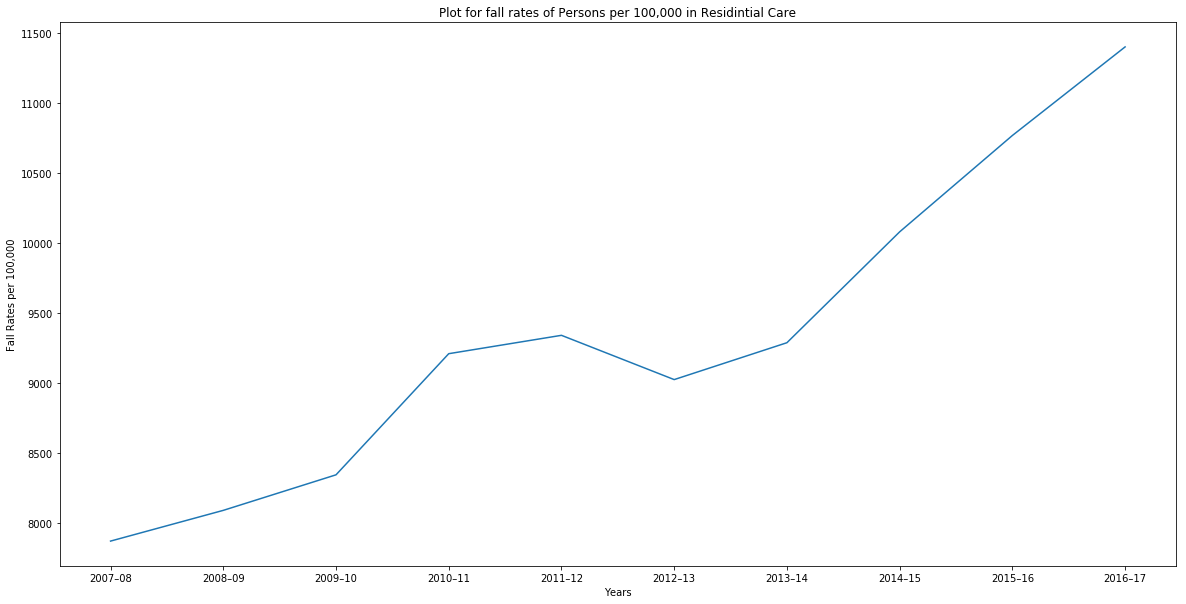

In [184]:
plt.figure(figsize=(20,10))
plt.xlabel("Years")
plt.ylabel("Fall Rates per 100,000")
plt.title("Plot for fall rates of Persons per 100,000 in Residintial Care")
plt.plot(Years_res, Persons_res)

We can see from the above plot that the number of falls has been increasing over time. In fact the number of falls in older people in Australia has increased by about 6 times the number of falls over 10 years back. This could give us just one insight that there has not been any kind of solution designed to adress this problem which has been successful.

### Plots for fall injury rate in Community Resident care

Now similar to the residential care we also have a look at the residential care too.

In [174]:
df_community_resident=df_community_resident.rename(columns = {np.nan:'Years'})
df_community_resident

1,Years,Males,Females,Persons(b)
2,2007–08,1038.97,1750.28,1450.06
3,2008–09,1050,1796.55,1482.05
4,2009–10,1111.94,1854.91,1539.08
5,2010–11,1214.33,1964.48,1643.05
6,2011–12,1244.61,1998.2,1670.73
7,2012–13,1243.88,1987.59,1665.54
8,2013–14,1278.39,2057.53,1716.39
9,2014–15,1365.64,2162.5,1809.32
10,2015–16,1410.36,2190.74,1918.65
11,2016–17,1467.43,2230.53,1888.04


In [175]:
Males_com = list(df_community_resident['Males'])
Females_com = list(df_community_resident['Females'])
Persons_com = list(df_community_resident['Persons(b)'])
Years_com = list(df_community_resident['Years'])

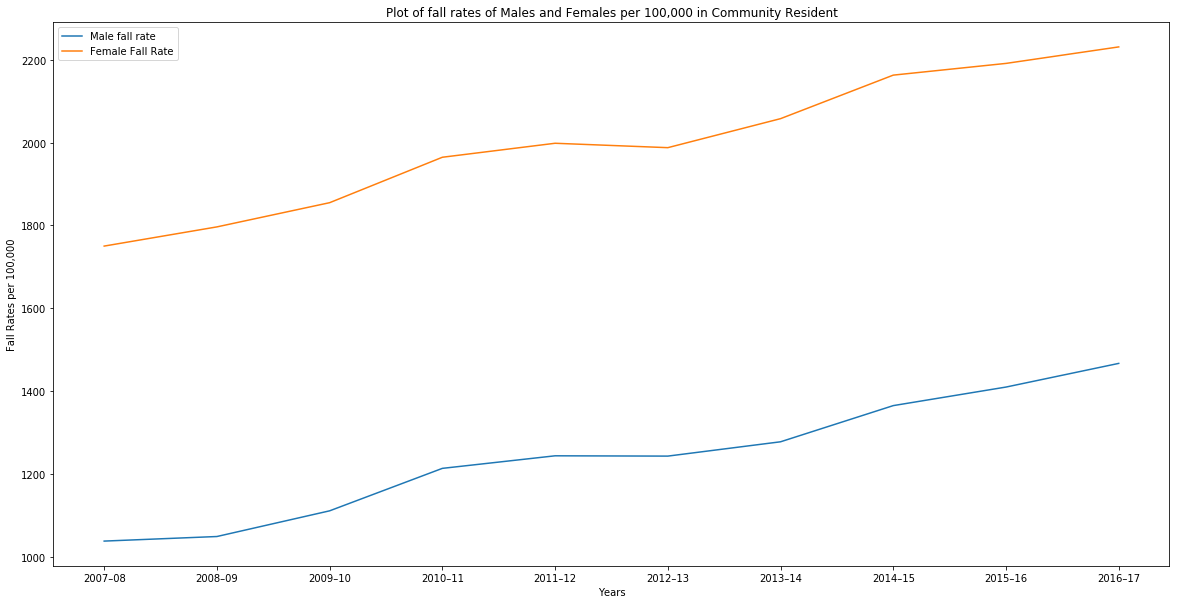

In [177]:
plt.figure(figsize=(20,10))
plt.xlabel("Years")
plt.ylabel("Fall Rates per 100,000")
plt.title("Plot of fall rates of Males and Females per 100,000 in Community Resident")
plt.plot(Years_com, Males_com, Females_com)
plt.legend(['Male fall rate','Female Fall Rate'])

In community care we can see that the number of falls in females has been more that the number of falls in older males.We can also see that the gap is more in the plot which tells that the number of falls in older females has been very high compared to the falls of older males. Also the falls in this case has been very less compared to the residential care.

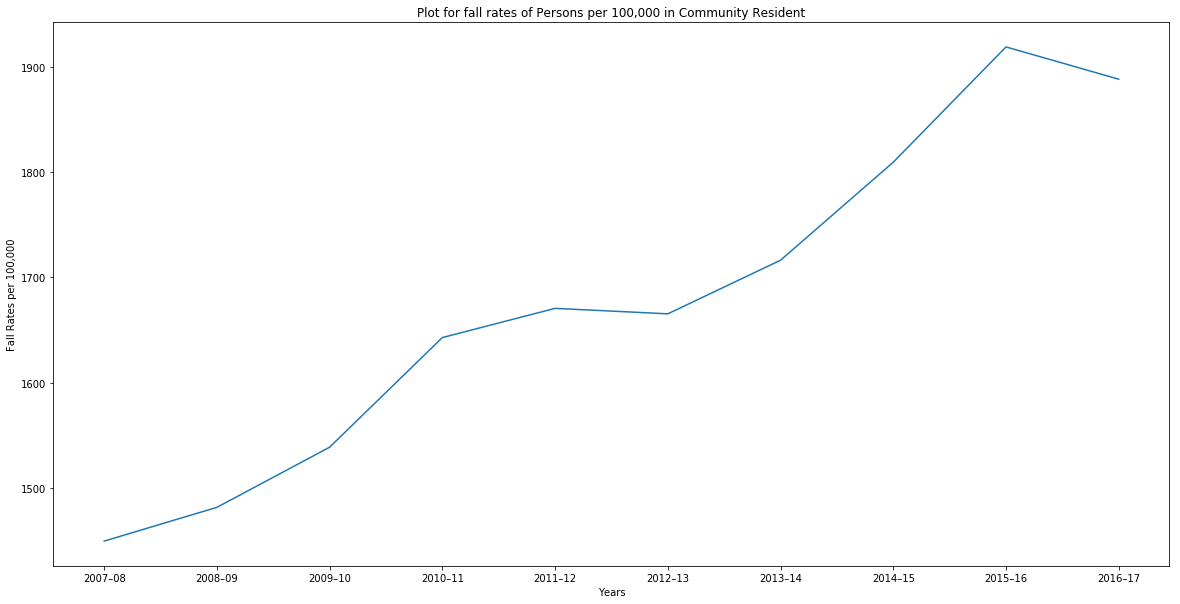

In [183]:
plt.figure(figsize=(20,10))
plt.xlabel("Years")
plt.ylabel("Fall Rates per 100,000")
plt.title("Plot for fall rates of Persons per 100,000 in Community Resident")
plt.plot(Years_com, Persons_com)

As seen from the above plot we can see that the number of falls in persons has been increasing over the last 10 years in community resident care too. The falls in community resident care is much less compared to the resident care however it has been increasing. The increase is not as much as the resident care.

### Insight on the projects

This gives us one insight if we have a look at the resident care older people falls has grown rapidly over the ten year period and this kind of drastic increase is not present in community care. The main reason is in community resident there are professional care workers present who would take care of the older people who are residing there. In residential places however this is not possible. 

Hence our application could give an impact as to heling solve this problem and data shows us that if we bring this successufully then we can help a major population of older people and get the plot of older people falls drastically.